# **AGRUPAMENTO HIERÁRQUICO**

- A verificação da quantidade de clusters é feita por meio de uma estrutura no formato de árvore.
- Abordagem aglomerativa: cada registro pertence ao seu próprio cluster e pares de clusters são unidos.
- Os resultados podem er apresentados em um dendrograma.

- Para definir a quantidade de clusters veja no dendrograma as linhas verticais que não são cruzadas em nenhum ponto pela extensão de uma linha horizontal, a quantidade de linhas verticais que forem cortadas é a quantidade de clusters que existirão.

![](https://dashee87.github.io/images/hierarch.gif)


Fonte: https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/

---
- Links para aprender mais:
    - [Introdução ao Agrupamento Hierárquico - IAexpert](https://iaexpert.com.br/index.php/2018/10/20/introducao-ao-agrupamento-hierarquico/)
    - [Hierarchical Clustering - Cognitive Class](https://youtu.be/rESc1vUDsdA)
    - [More on Hierarchical Clustering - Cognitive Class](https://youtu.be/d92Pcj_zxu8)
    - [Hierarchical Clustering - Wikipedia](https://en.wikipedia.org/wiki/Hierarchical_clustering).
    - [Clustering with Scikit with GIFs - David Sheehan](https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)
---    

# **IMPLEMENTAÇÃO**
Para a implementação do algoritmo foi utilizada a biblioteca Sklearn, veja a [Documentação](https://scikit-learn.org/stable/modules/classes.html#)

## EXEMPLO SIMPLES
Para esse exemplo vamos analisar um exemplo simples, com uma base de dados pequena.

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
#----------------------------Criando uma base teste---------------------------#
base = np.array([[20,1000],[27,1200],[21,2900],[37,1850],[46,900],
                 [53,950],[55,2000],[47,2100],[52,3000],[32,5900],
                 [39,4100],[41,5100],[39,7000],[48,5000],[48,6500]])

#----------------------------Escalonando registros----------------------------#
scaler = StandardScaler()
base = scaler.fit_transform(base)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Agora podemos criar o dendrograma

Text(0,0.5,'Distância Euclidiana')

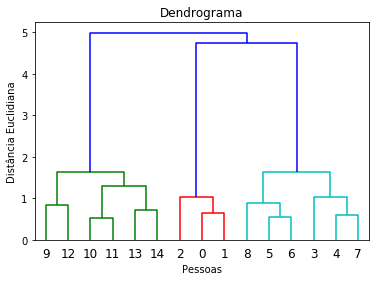

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

dendrograma = dendrogram(linkage(base, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância Euclidiana')

Foram escolhidos 3 cluster pois veja que as 3 barras verticais em azul escuro não cruzamento com nenhum prolongamento das linhas horizontais.

Agora podemos criar o agrupador e plotar os registros agrupados com cores indicativas de cada cluster.

Text(0,0.5,'Salário')

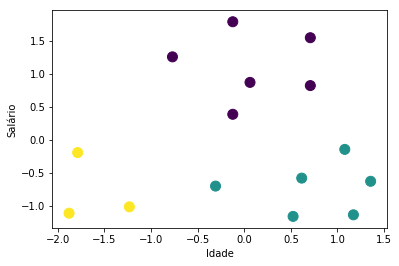

In [3]:
#------------Criando agrupador e fazendo a previsão dos registros-------------#
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(base)

#---------------------------Visualizando os dados-----------------------------#
plt.scatter(base[:,0], base[:,1], s = 100, c = previsoes)
plt.xlabel('Idade')
plt.ylabel('Salário')

## EXEMPLO REAL
Para o exemplo real será utilizada a base de dados credit_card_clients.csv

> OBS 1.: Se tiver duvidas de como inserir uma base de dados no kaggle, nesse kernel [aqui](https://www.kaggle.com/lucasfdutra/regras-de-associa-o?scriptVersionId=10604491) (mais ou menos na metade dele) eu mostrei como fazer isso.   

> OBS 2.: Veja que eu cortei a base de dados para só 1000 registros, isso porque o meu computador não aguentou fazer com todos, ele deu erro de memória.

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


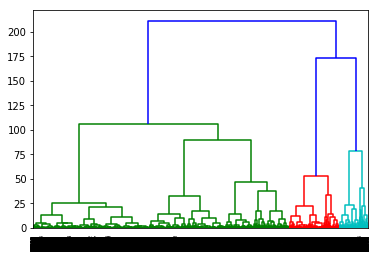

In [4]:
import pandas as pd
#----------------Coloca a base de dados na variável 'base'--------------------#
base = pd.read_csv('../input/credit_card_clients.csv', header = 1)

#--------------------------Somando as dividas---------------------------------#
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

#----------------Definindo os previsores e os escalonando---------------------#
X = base.iloc[:,[1,25]].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

#----------------------------Geração do dendograma----------------------------#
dendrograma = dendrogram(linkage(X, method = 'ward'))

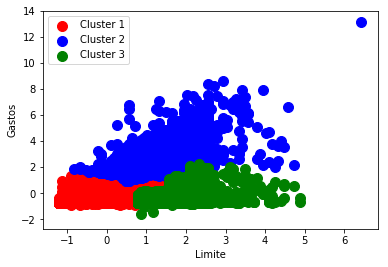

In [5]:
#------------Criando agrupador e fazendo a previsão dos registros-------------#
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(X)

#---------------------------Visualizando os dados-----------------------------#
%matplotlib inline  
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()